## Data processing and analysis in Python language - Python code

I divided the code into three main parts: **Data import**, **Data processing** and **Data analysis**.

### Data import

First of all, I import all the libraries needed for the project.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Then, I import the dataset showing its structure.

In [24]:
pd.set_option('display.max_rows', None)
df = pd.read_csv('isoc_sk_dskl_i_1_Data.csv')
df

,TIME,GEO,INDIC_IS,IND_TYPE,UNIT,Value,Flag and Footnotes
0,2015,European Union - 27 countries (from 2020),Individuals who have low overall digital skills,All Individuals,Percentage of individuals,23,NaN
1,2015,European Union - 27 countries (from 2020),Individuals who have basic overall digital skills,All Individuals,Percentage of individuals,27,NaN
2,2015,European Union - 27 countries (from 2020),Individuals who have above basic overall digit...,All Individuals,Percentage of individuals,27,NaN
3,2015,European Union - 27 countries (from 2020),Individuals who have basic or above basic over...,All Individuals,Percentage of individuals,54,NaN
4,2015,European Union - 27 countries (from 2020),Individuals who have no overall digital skills,All Individuals,Percentage of individuals,1,NaN
5,2015,European Union - 28 countries (2013-2020),Individuals who have low overall digital skills,All Individuals,Percentage of individuals,23,NaN
6,2015,European Union - 28 countries (2013-2020),Individuals who have basic overall digital skills,All Individuals,Percentage of individuals,27,NaN
7,2015,European Union - 28 countries (2013-2020),Individuals who have above basic overall digit...,All Individuals,Percentage of individuals,28,NaN
8,2015,European Union - 28 countries (2013-2020),Individuals who have basic or above basic over...,All Individuals,Percentage of individuals,55,NaN
9,2015,European Union - 28 countries (2013-2020),Individuals who have no overall digital skills,All Individuals,Percentage of individuals,1,NaN


### Data processing

The data processing procedure begins, making all the changes that are shown in the pdf document. First, I delete the variable IND_TYPE.

In [25]:
df = df.drop('IND_TYPE', 1)
df.head()

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

I now proceed to delete the variable UNIT.

In [18]:
df = df.drop('UNIT', 1)
df.head()

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

I also remove the variable Flag and Footnotes.

In [19]:
df = df.drop('Flag and Footnotes', 1)
df.head()

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

I am going to delete the lines relating to the missing observations (":") of the variable VALUE, checking the success of the removal with data.shape.

In [21]:
df.shape

(860, 7)

In [22]:
df = df.loc[df['Value'] != ':']
df.shape

(761, 7)

I also delete the rows relating to the Euro area.

In [9]:
df = df.loc[df['GEO'] != 'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)']
df.shape

(741, 4)

Subsequently, I remove the rows of the variable 'European Union' that are not part of the 2013-2020 period.

In [10]:
df = df.loc[df['GEO'] != 'European Union - 27 countries (from 2020)']
df = df.loc[df['GEO'] != 'European Union - 27 countries (2007-2013)']
df = df.loc[df['GEO'] != 'European Union - 15 countries (1995-2004)']
df.shape

(691, 4)

I check that there are no remaining missing values.

In [11]:
df.isnull().sum()

TIME        0
GEO         0
INDIC_IS    0
Value       0
dtype: int64

No missing values are present. Then I drop all potential duplicates and check the result with data.shape.

In [12]:
df = df.drop_duplicates()
df.shape

(691, 4)

There are no duplicates. Now I rename the columns to make it easier to write the code.

In [13]:
df = df.rename(columns={'TIME': 'year', 'GEO': 'geo', 'INDIC_IS': 'skills', 'Value': 'value'})

In [14]:
df.head()

,year,geo,skills,value
5,2015,European Union - 28 countries (2013-2020),Individuals who have low overall digital skills,23
6,2015,European Union - 28 countries (2013-2020),Individuals who have basic overall digital skills,27
7,2015,European Union - 28 countries (2013-2020),Individuals who have above basic overall digit...,28
8,2015,European Union - 28 countries (2013-2020),Individuals who have basic or above basic over...,55
9,2015,European Union - 28 countries (2013-2020),Individuals who have no overall digital skills,1


I then proceed to reset the indexes (which have changed after the procedure of removing the rows of some variables) and show the final dataset.

In [15]:
df = df.reset_index(drop=True)

In [16]:
df

,year,geo,skills,value
0,2015,European Union - 28 countries (2013-2020),Individuals who have low overall digital skills,23
1,2015,European Union - 28 countries (2013-2020),Individuals who have basic overall digital skills,27
2,2015,European Union - 28 countries (2013-2020),Individuals who have above basic overall digit...,28
3,2015,European Union - 28 countries (2013-2020),Individuals who have basic or above basic over...,55
4,2015,European Union - 28 countries (2013-2020),Individuals who have no overall digital skills,1
5,2015,Belgium,Individuals who have low overall digital skills,24
6,2015,Belgium,Individuals who have basic overall digital skills,29
7,2015,Belgium,Individuals who have above basic overall digit...,31
8,2015,Belgium,Individuals who have basic or above basic over...,60
9,2015,Belgium,Individuals who have no overall digital skills,0


### Data analysis

As a first step, I create datasets of individuals from any country with at least basic digital skills for each year, starting with 2015. I also remove the remarks concerning the European Union. 

In [17]:
df = df.loc[df['geo'] != 'European Union - 28 countries (2013-2020)']
df.head()

,year,geo,skills,value
5,2015,Belgium,Individuals who have low overall digital skills,24
6,2015,Belgium,Individuals who have basic overall digital skills,29
7,2015,Belgium,Individuals who have above basic overall digit...,31
8,2015,Belgium,Individuals who have basic or above basic over...,60
9,2015,Belgium,Individuals who have no overall digital skills,0


In [18]:
df_2015 = df[(df.year == 2015) & (df.skills == 'Individuals who have basic or above basic overall digital skills')]
df_2015.head()

,year,geo,skills,value
8,2015,Belgium,Individuals who have basic or above basic over...,60
13,2015,Bulgaria,Individuals who have basic or above basic over...,31
18,2015,Czechia,Individuals who have basic or above basic over...,57
23,2015,Denmark,Individuals who have basic or above basic over...,75
28,2015,Germany (until 1990 former territory of the FRG),Individuals who have basic or above basic over...,67


I repeat the creation of the dataset for each year (2018 is not considered because it is not present in the dataset).

In [19]:
df_2016 = df[(df.year == 2016) & (df.skills == 'Individuals who have basic or above basic overall digital skills')]
df_2016.head()

,year,geo,skills,value
172,2016,Belgium,Individuals who have basic or above basic over...,61
177,2016,Bulgaria,Individuals who have basic or above basic over...,26
182,2016,Czechia,Individuals who have basic or above basic over...,54
187,2016,Denmark,Individuals who have basic or above basic over...,78
192,2016,Germany (until 1990 former territory of the FRG),Individuals who have basic or above basic over...,68


In [20]:
df_2017 = df[(df.year == 2017) & (df.skills == 'Individuals who have basic or above basic overall digital skills')]
df_2017.head()

,year,geo,skills,value
331,2017,Belgium,Individuals who have basic or above basic over...,61
336,2017,Bulgaria,Individuals who have basic or above basic over...,29
341,2017,Czechia,Individuals who have basic or above basic over...,60
346,2017,Denmark,Individuals who have basic or above basic over...,71
351,2017,Germany (until 1990 former territory of the FRG),Individuals who have basic or above basic over...,68


In [21]:
df_2019 = df[(df.year == 2019) & (df.skills == 'Individuals who have basic or above basic overall digital skills')]
df_2019.head()

,year,geo,skills,value
510,2019,Belgium,Individuals who have basic or above basic over...,61
515,2019,Bulgaria,Individuals who have basic or above basic over...,29
520,2019,Czechia,Individuals who have basic or above basic over...,62
525,2019,Denmark,Individuals who have basic or above basic over...,70
530,2019,Germany (until 1990 former territory of the FRG),Individuals who have basic or above basic over...,70


Now I calculate the average of the variable "value" for each dataset created. 

2015

In [22]:
df_2015['value'] = df_2015.value.astype(float)
avg_value_2015 = df_2015['value'].mean()
avg_value_2015

<ipython-input-22-34c9d05b9508>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['value'] = df_2015.value.astype(float)


53.71875

2016

In [23]:
df_2016['value'] = df_2016.value.astype(float)
avg_value_2016 = df_2016['value'].mean()
avg_value_2016

<ipython-input-23-45fd14a0b409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['value'] = df_2016.value.astype(float)


54.67741935483871

2017

In [24]:
df_2017['value'] = df_2017.value.astype(float)
avg_value_2017 = df_2017['value'].mean()
avg_value_2017

<ipython-input-24-7fdc14b92c74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['value'] = df_2017.value.astype(float)


56.08571428571429

2019

In [25]:
df_2019['value'] = df_2019.value.astype(float)
avg_value_2019 = df_2019['value'].mean()
avg_value_2019

<ipython-input-25-091cffb710d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['value'] = df_2019.value.astype(float)


54.486486486486484

Grouping the results into a single list.

In [27]:
avg_values = [avg_value_2015, avg_value_2016, avg_value_2017, avg_value_2019]
avg_values

[53.71875, 54.67741935483871, 56.08571428571429, 54.486486486486484]

Rounding the average values to the second value after the decimal point with a for loop.

In [29]:
avg_values_rounded = []
for i in avg_values:
    avg_values_rounded.append(round(i,2))
avg_values_rounded

[53.72, 54.68, 56.09, 54.49]

I now draw a bar graph with the average values just found and the years.

In [30]:
df_year = df['year'].unique().tolist()
df_year

[2015, 2016, 2017, 2019]

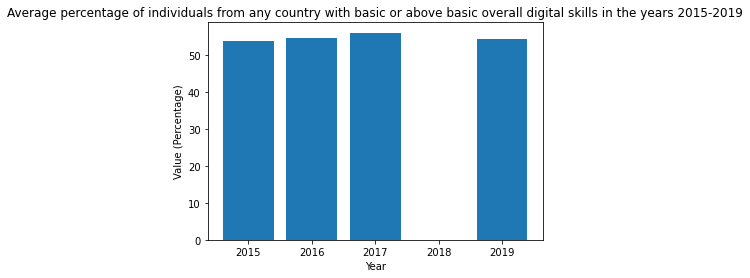

In [31]:
plt.bar(df_year, avg_values_rounded)
plt.xlabel('Year') 
plt.ylabel('Value (Percentage)')
plt.title('Average percentage of individuals from any country with basic or above basic overall digital skills in the years 2015-2019')
plt.show()

Now I analyse the situation in Italy and Poland.

Italy

In [32]:
df_it = df[(df.geo == 'Italy') & (df.skills == 'Individuals who have basic or above basic overall digital skills')]
df_it

,year,geo,skills,value
63,2015,Italy,Individuals who have basic or above basic over...,43
227,2016,Italy,Individuals who have basic or above basic over...,44
565,2019,Italy,Individuals who have basic or above basic over...,42


Poland

In [33]:
df_pl = df[(df.geo == 'Poland') & (df.skills == 'Individuals who have basic or above basic overall digital skills')]
df_pl

,year,geo,skills,value
108,2015,Poland,Individuals who have basic or above basic over...,40
272,2016,Poland,Individuals who have basic or above basic over...,44
426,2017,Poland,Individuals who have basic or above basic over...,46
610,2019,Poland,Individuals who have basic or above basic over...,44


Since there is no data for Italy for the year 2017, I delete the corresponding row for Poland for fairness.

In [34]:
df_pl = df_pl.loc[df_pl['year'] != 2017]
df_pl

,year,geo,skills,value
108,2015,Poland,Individuals who have basic or above basic over...,40
272,2016,Poland,Individuals who have basic or above basic over...,44
610,2019,Poland,Individuals who have basic or above basic over...,44


I convert in float the varible "value" of the two datasets.

In [35]:
df_it['value'] = df_it.value.astype(float)

<ipython-input-35-9cf6779890f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_it['value'] = df_it.value.astype(float)


In [36]:
df_pl['value'] = df_pl.value.astype(float)

<ipython-input-36-0b81d7efd358>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pl['value'] = df_pl.value.astype(float)


I now draw the plots for Italy and Poland and superimpose them.

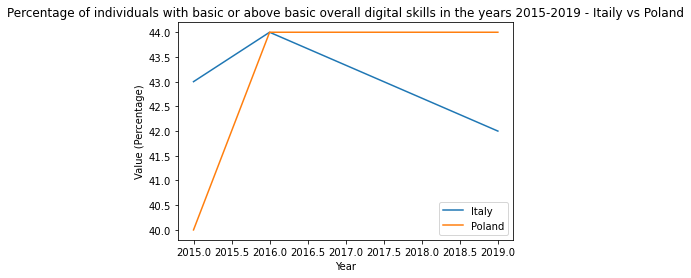

In [37]:
plt.plot(df_it.year, df_it.value)
plt.plot(df_pl.year, df_pl.value)
plt.xlabel('Year') 
plt.ylabel('Value (Percentage)') 
plt.title('Percentage of individuals with basic or above basic overall digital skills in the years 2015-2019 - Itaily vs Poland')
plt.legend(['Italy', 'Poland'])
plt.show()

Finally, I calculate the average of the variable 'value' for all the datasets found, i.e. the global dataset, the Italian dataset and the Polish dataset, comparing them with each other and with the European standard. For this purpose, to simplify things, I create a specific function.

Global

In [42]:
def Average(x):
    return round(sum(x) / len(x), 2)
Average(avg_values_rounded)

54.75

Italy

In [39]:
Average(df_it.value)

43.0

Poland

In [40]:
round(Average(df_pl.value), 2)

42.67